# 1 - Warm Up Exercise
Display a 5x5 identity matrix

In [1]:
function A = warmUpExercise()
  A = eye(5);
endfunction

In [2]:
warmUpExercise()

ans =

Diagonal Matrix

   1   0   0   0   0
   0   1   0   0   0
   0   0   1   0   0
   0   0   0   1   0
   0   0   0   0   1



# 2 - Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand
to next.

## 2.1 - Loading and plotting the data

The data is contained in the file `ext1data1.txt`.

In [3]:
%plot -f svg -w 1000
addpath('includes/ex1');

data = load('ex1data1.txt'); % read comma separated data
X = data(:, 1);
y = data(:, 2);
m = length(y); % number of training examples

We create a plotData function to get familiar with the data

In [4]:
function plotData(x, y)
    figure;
    plot(x, y, 'rx', 'MarkerSize', 5);
    ylabel('Profit in $10,000s');
    xlabel('Population of City in 10,000s');
endfunction

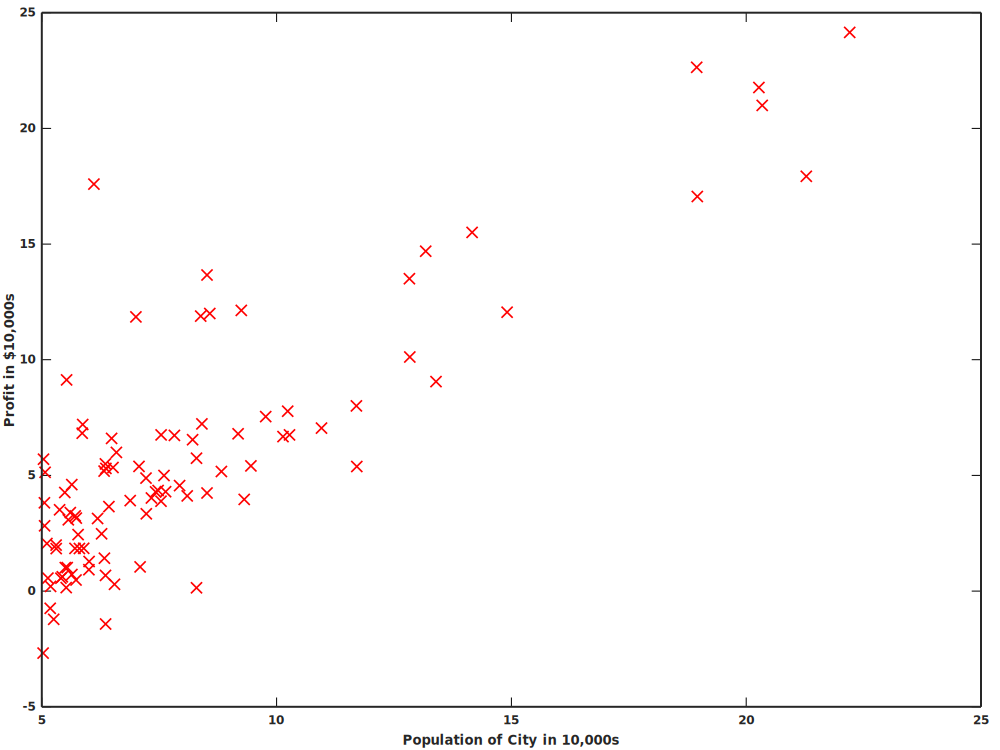

In [5]:
plotData(X, y);

## 2.2 - Gradient Descent

In this part, you will fit the linear regression parameters θ to our dataset
using gradient descent.

### 2.2.1 - Update equations
We want to minimize
$$
\begin{align*}
J(\theta)&=\frac{1}{2m}\sum^m_{i=1}\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right)^2
\end{align*}
$$

Where
$$
h_\theta(x)=\theta_0+\theta_1x_1=\theta^Tx
$$

The gradient descent update equation is
$$
\begin{align*}
\theta_j:=\theta_j-\alpha\frac{1}{m}\sum^m_{i=1}\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right)x^{(i)}_j
\end{align*}
$$
With simultaneous update of $\theta_j$ for all $j$

### 2.2.2 - Implementation
We add the $x_0$ feature and initialize our parameters $\theta$ and $\alpha$

In [6]:
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters
iterations = 1500;
alpha = 0.01;

### 2.2.3 - Computing the cost

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$  so you can check the convergence of your gradient descent implementation.

In [7]:
function J = computeCost(X, y, theta)
    m = length(y);
    
    predictions = X*theta;
    squaredDifference = (predictions-y).^2;

    J = 1/(2*m) * sum(squaredDifference);
endfunction

In [8]:
% Test the cost function
fprintf('\nTesting the cost function ...\n')
% compute and display initial cost
J = computeCost(X, y, theta);
fprintf('With theta = [0 ; 0]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 32.07\n');

% further testing of the cost function
J = computeCost(X, y, [-1 ; 2]);
fprintf('\nWith theta = [-1 ; 2]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 54.24\n');


Testing the cost function ...
With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07

With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24


### 2.2.4 - Gradient Descent
You will implement gradient descent in `gradientDescent` function

In [9]:
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
    m = length(y); % number of training examples
    J_history = zeros(num_iters, 1);

    for iter = 1:num_iters
        hypothesis = X*theta;
        
        theta = theta - alpha / m * X' * (hypothesis - y);
        
        % Save the cost J in every iteration
        J_history(iter) = computeCost(X, y, theta);
    end
endfunction

In [10]:
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent:\n');
fprintf('%f\n', theta);
fprintf('Expected theta values (approx)\n');
fprintf(' -3.6303\n  1.1664\n\n');

Theta found by gradient descent:
-3.630291
1.166362
Expected theta values (approx)
 -3.6303
  1.1664



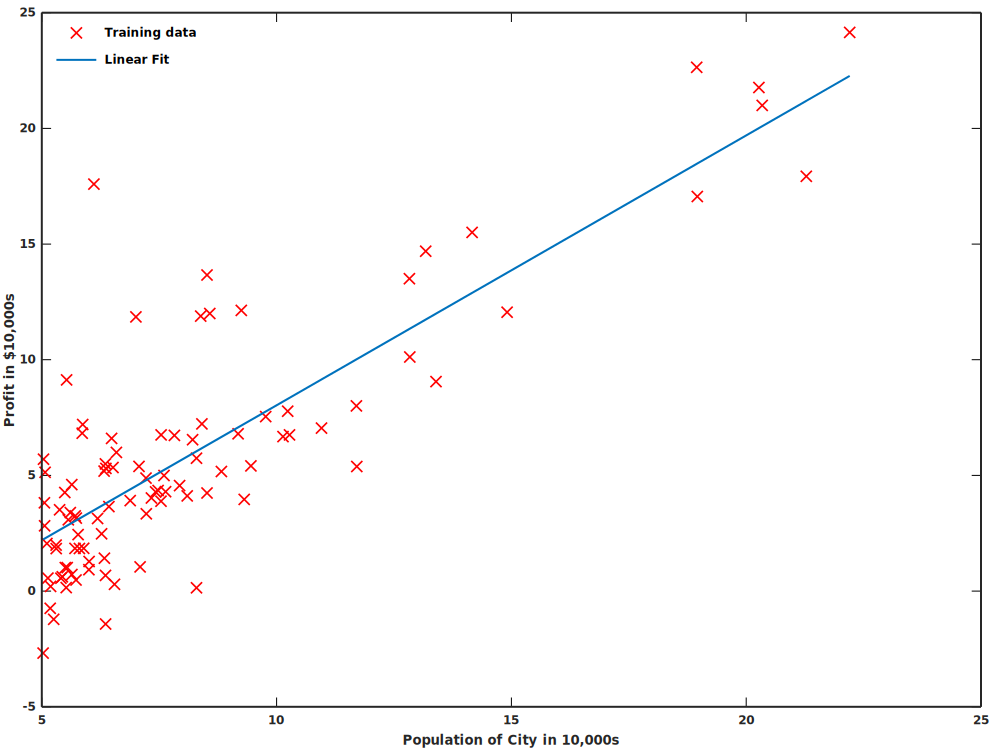

In [11]:
plotData(X(:, 2), y)
hold on;
% Plot the linear fit
plot(X(:,2), X*theta, '-');
legend('Training data', 'Linear Fit');
legend location northwest;
legend boxoff
hold off;

## 2.3 - Visualizing $J(\theta)$

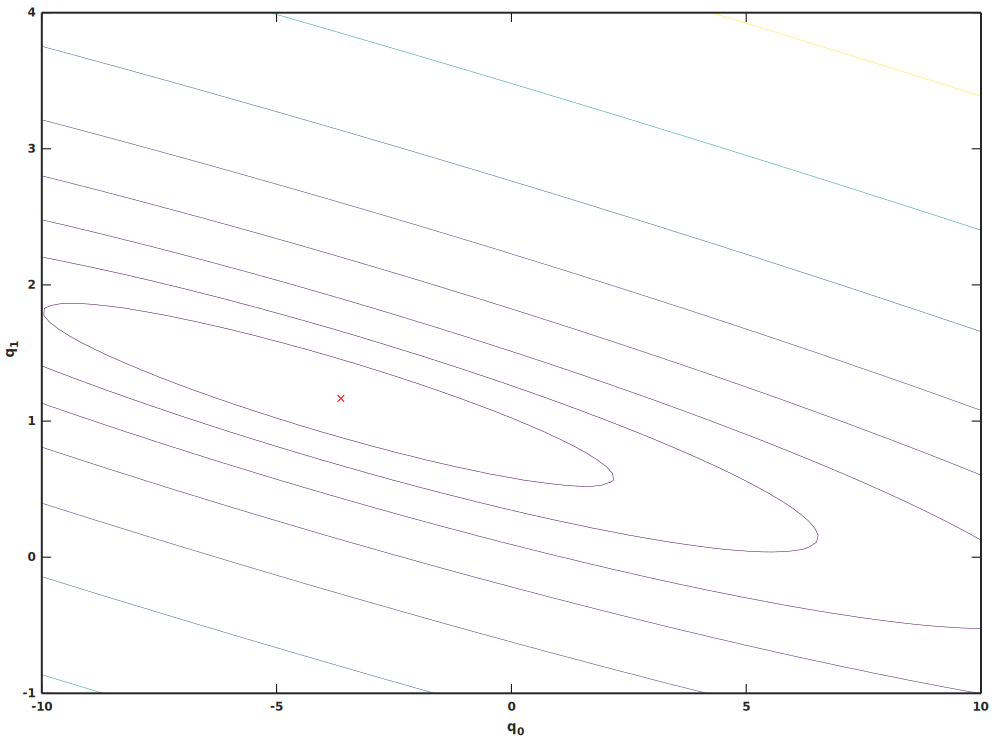

In [12]:
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)    
        t = [theta0_vals(i); theta1_vals(j)];    
        J_vals(i,j) = computeCost(X, y, t);
    end
end

% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 3, 'LineWidth', 2);

In [13]:
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); 
ylabel('\theta_1');

# Optional exercises: Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

## 3.1 - Feature normalization

In [14]:
clear;
% We load the data
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

In [15]:
function [X_norm, mu, sigma] = featureNormalize(X)

    X_norm = X;
    mu = mean(X);
    sigma = std(X);

    for i = 1:size(X, 2)
        X_norm(:, i) = (X(:,i) - mu(i)) / sigma(i);
    end

endfunction

In [16]:
[X mu sigma] = featureNormalize(X);

% Add intercept term to X
X = [ones(m, 1) X];

## 3.2 - Gradient descent

Now that the problem has multiple variables, we need to compute the cost function for multiple variables

In [17]:
function J = computeCostMulti(X, y, theta) 
    m = length(y);
    diff = X*theta-y;

    J = 1/(2*m) * diff' * diff;
endfunction

And we need to create our gradient descent logic

In [18]:
function [theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters)
    m = length(y); % number of training examples
    J_history = zeros(num_iters, 1);

    for iter = 1:num_iters
        hypothesis = X*theta;
        
        theta = theta - alpha / m * X' * (hypothesis - y);
        
        % Save the cost J in every iteration    
        J_history(iter) = computeCostMulti(X, y, theta);
    end
endfunction

We set our $\alpha$ and $\theta$ and run gradient descent

In [19]:
alpha = 0.01;
num_iters = 1500;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

We plot our cost over iterations

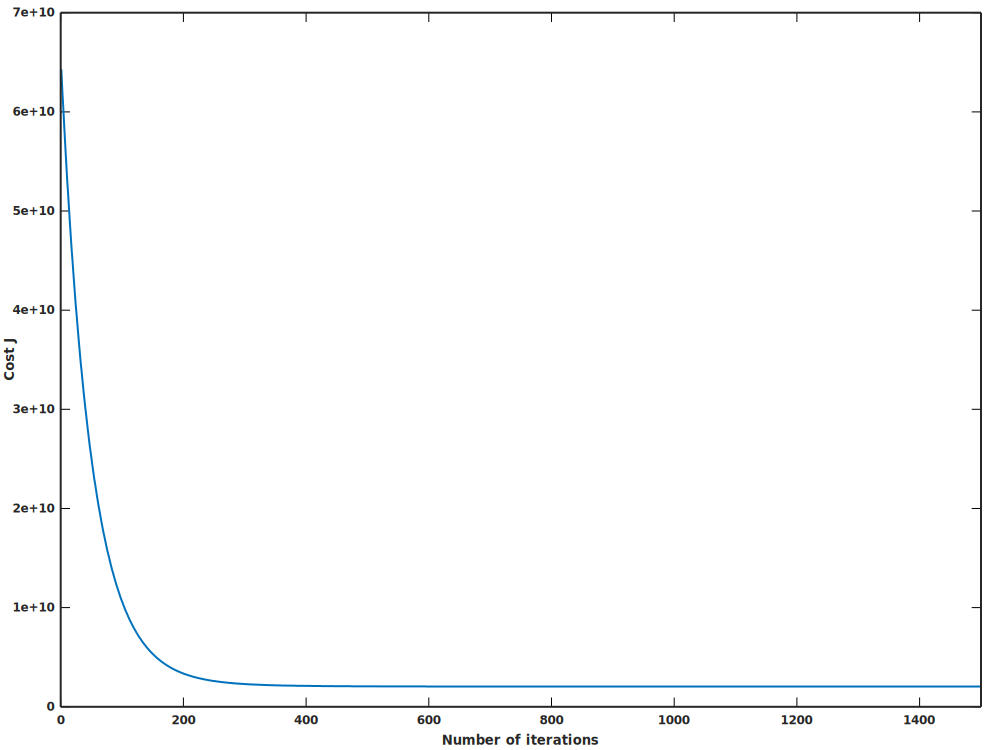

In [20]:
figure;
plot(1:numel(J_history), J_history, '-');
xlabel('Number of iterations');
ylabel('Cost J');
axis([0 1500 0 7e10]);

As we can see, the function converges fast enough so that we can decrease the amount if iterations and the learning rate.

In [21]:
alpha = [0.3; 0.1; 0.03; 0.01];
num_iters = 50;

In [22]:
function plotGradient(X, y, alpha, num_iters)
    figure;
    hold on;
    for i = 1:length(alpha)
        theta= zeros(3, 1);
        [theta, J_history] = gradientDescentMulti(X, y, theta, alpha(i), num_iters);
        plot(1:numel(J_history), J_history);
    end
    legend(strcat("\\alpha = ", num2str(alpha)));
    legend boxoff;
    legend left;
    xlabel('Number of iterations');
    ylabel('Cost J');
    axis([1 num_iters 0 7e10]);
    hold off;
endfunction

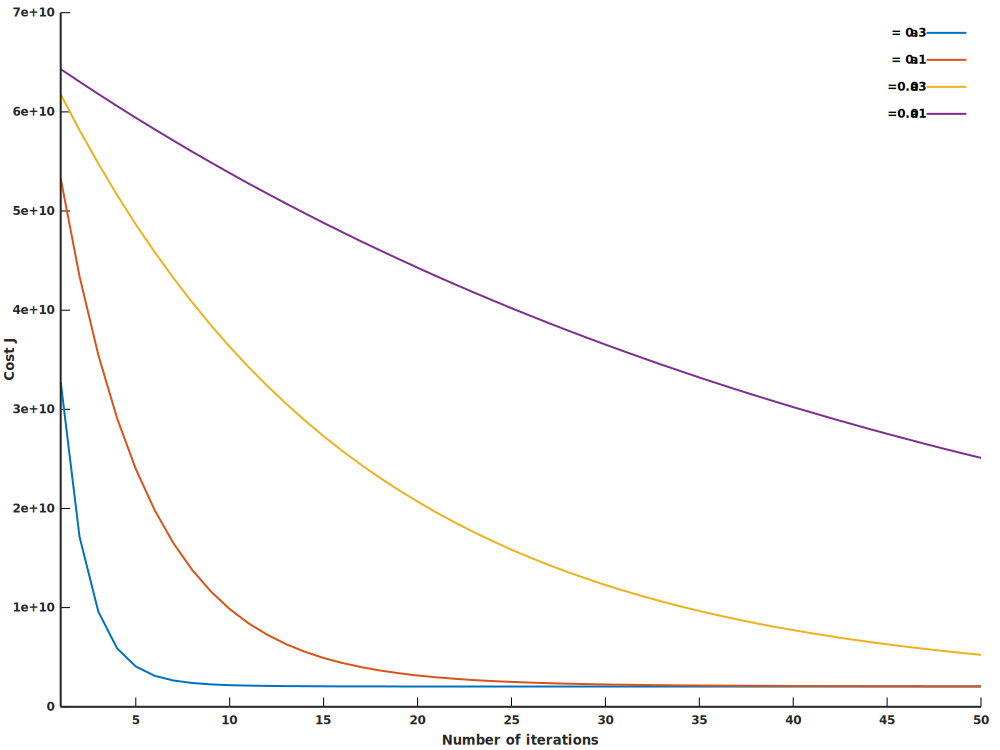

In [23]:
plotGradient(X, y, alpha, num_iters)

As we can see, $0.1$ is our optimal learning rate. We print the value of theta found

In [24]:
alpha = 0.1;
num_iters = 50;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);
disp(theta);

   3.3866e+05
   1.0413e+05
  -1.7221e+02


We are now going to predict the price of a $1650 \mbox{ ft}^2$ house with 3 bedrooms

In [25]:
% We normalize our two features. x0 is 1, and needn't normalization
price = theta(1) + theta(2)*((1650-mu(1))/sigma(1)) + theta(3)*((3-mu(2))/sigma(2));
fprintf(['Predicted price of a 1650 sq-ft, 3 bedrooms house ' ...
         '(using gradient descent):\n $%f\n'], price);


Predicted price of a 1650 sq-ft, 3 bedrooms house (using gradient descent):
 $292748.085232


## 3.3 - Normal equations

Using the normal equation, we can calculate the optimal theta with the following equation

$$
\theta=\left(X^TX\right)^{-1}X^T\vec{y}
$$

Using this formula does not require any feature scaling, and you will get
an exact solution in one calculation: there is no “loop until convergence” like
in gradient descent.

In [26]:
function [theta] = normalEqn(X, y)
    theta = pinv(X'*X)*X'*y;
endfunction

In [27]:
data = csvread('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept term to X
X = [ones(m, 1) X];

% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);
fprintf('\n');

Theta computed from the normal equations: 
 89597.909542 
 139.210674 
 -8738.019112 



In the same way we did before, we predict the price of a $1650\mbox{ ft}^2$ house with 3 bedrooms

In [28]:
price = theta(1) + theta(2)*1650 + theta(3)*3;

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);


Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335
